In [23]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

In [24]:
data = pd.read_csv("housing.csv")

In [25]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv("housing.csv", header=None, names=names, delimiter='\s+')

In [26]:
X = pd.DataFrame(np.c_[data['LSTAT']], columns = ['LSTAT'])
Y = data['MEDV']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))
    
  plt.scatter(X_test, Y_test, color = 'blue')
  plt.plot(X_test, y_test_predict, color = 'red')
  plt.title('House Price vs LSTAT')
  plt.xlabel('LSTAT')
  plt.ylabel('House Price')
  plt.show()

The model performance for the training set
-------------------------------------------
RMSE of training set is 5.552029848936066
R2 score of training set is 0.6411591817537179


The model performance for the test set
-------------------------------------------
RMSE of test set is 5.332315656621563
R2 score of test set is 0.6368350327760253


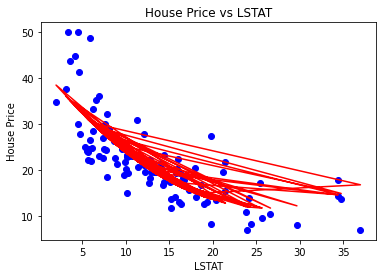

The model performance for the training set
-------------------------------------------
RMSE of training set is 7.775790291261152
R2 score of training set is 0.2961383026578239


The model performance for the test set
-------------------------------------------
RMSE of test set is 69.9149629618904
R2 score of test set is -61.4327565728179


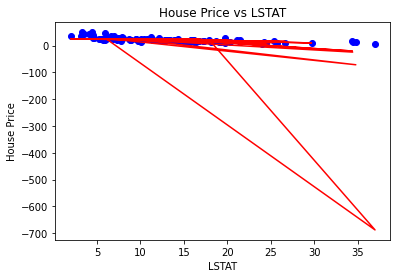

In [36]:
polynomial_regression_model(2)
polynomial_regression_model(20)
